# Investigating the TMDb Movies Dataset

## Introduction
In this project, we will be investigating a dataset containing information about movies in the period from 2008 to 2016. This dataset is collected from 'The Movie Database' (TMDb) — a user editable database for movies and TV shows widely used by developers especially in the fields of data science and data analysis — and make some visualizations and conclusions that will help get the most out of this dataset. The information in this dataset contains information about movies including budget, revenue, genres, director and more.

Throughout this project, we will be answering various questions regarding the movie dataset. The 
- Which movies have the highest popularity/revenue?
- Which directors have the highest average popularity/revenue?
- How does the budget relate to popularity and revenue?

### Importing Libraries

In [1]:
import numbers
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Data Wrangling

### Data Loading
Naturally, the data analysis journey begins with loading the dataset(s) to the environment.

In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


There are 21 columns in this dataset.

### Data Cleaning
At this point, we will be doing a data cleanup; that is, removing duplicates, null values and any unwanted data items that can negatively affect the process.

In [3]:
#Count the duplicates and remove them
print('Duplicates count (before):', sum(df_movies.duplicated()))
df_movies.dropna(inplace=True)
print('Duplicates count (after):', sum(df_movies.duplicated()))

Duplicates count (before): 1
Duplicates count (after): 0


In [4]:
#Convert every column to a proper format, strings are kept objects
for col in df_movies.columns:
    if isinstance(df_movies[col][0], numbers.Number):
        df_movies[col] = pd.to_numeric(df_movies[col])
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
print(df_movies['id'].head(2), '_'*24, sep='\n')
print(df_movies['popularity'].head(2), '_'*24, sep='\n')
print(df_movies['release_date'].head(2), '_'*24, sep='\n')

0    135397
1     76341
Name: id, dtype: int64
________________________
0    32.985763
1    28.419936
Name: popularity, dtype: float64
________________________
0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]
________________________


In [5]:
#Check for null values
print(df_movies.shape)
df_movies.info()

(1992, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1992 non-null   int64         
 1   imdb_id               1992 non-null   object        
 2   popularity            1992 non-null   float64       
 3   budget                1992 non-null   int64         
 4   revenue               1992 non-null   int64         
 5   original_title        1992 non-null   object        
 6   cast                  1992 non-null   object        
 7   homepage              1992 non-null   object        
 8   director              1992 non-null   object        
 9   tagline               1992 non-null   object        
 10  keywords              1992 non-null   object        
 11  overview              1992 non-null   object        
 12  runtime               1992 non-null   int64         
 13  genres

From the previous, we can see that the dataset contains no null values in the numeric columns. That said, there is no need to further remove any NA values.

## Exploratory Data Analytics
Now, that we have our dataset well-prepared for analysis, we now can go ahead and further explore this dataset using visualisations and build our conclusions.

Some of the plots we will use throughout the rest of the project will follow a fairly systematic approach. This is a good point to encapsulate them into functions.

In [6]:
def fast_scatter(x_series, y_series, title, x_label, y_label):
    fig, ax = plt.subplots()
    plt.title(title)
    ax.scatter(x_series, y_series)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
def fast_bar(x_value, y_value, title, x_label, y_label):
    ax = sns.barplot(x=x_value, y=y_value)
    plt.title(title)
    sns.set(font_scale=1.2)
    ax.set(xlabel=x_label, ylabel=y_label)
    barplot = sns.barplot(x=x_value, y=y_value, color='c')

### 1. The Top 10 Movies by Popularity and Revenue
In this part we will be examining the top 10 movies regarding popularity and revenue.

#### 1.1. Top 10 Movies by Popularity

In [7]:
#Sort the movies by popularity
top10_popularity = df_movies.iloc[df_movies['popularity'].argsort()][-10:][-1::-1].copy()
top10_popularity

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,http://www.captainamericathewintersoldiermovie...,Joe Russo|Anthony Russo,In heroes we trust.,...,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
632,245891,tt2911666,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,Don't set him off.,...,"After the sudden death of his beloved wife, Jo...",101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
633,131631,tt1951265,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Francis Lawrence,Fire burns brighter in the darkness,...,Katniss Everdeen reluctantly becomes the sym

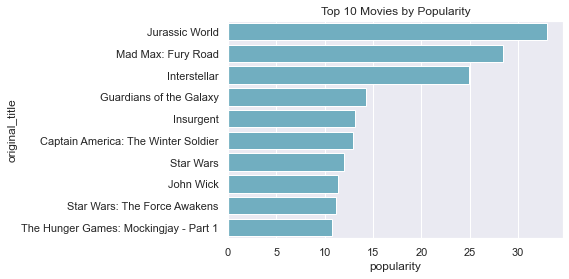

In [8]:
#View the top 10 movies by their popularity
fast_bar(
    top10_popularity['popularity'],
    top10_popularity['original_title'],
    'Top 10 Movies by Popularity',
    'Popularity',
    'Movie'
)

The highest popularity reached by a movie is that of _Jurassic World_ (about 32.986).

#### 1.2. Top 10 Movies by Revenue

In [9]:
#Sort the movies by revenue
top10_revenue = df_movies.iloc[df_movies['revenue'].argsort()][-10:][-1::-1].copy()
top10_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902.9,2.827124e+09
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,271692064.2,2.506406e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,208943741.9,1.443191e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,257599886.7,1.292632e+09
3374,12445,tt1201607,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,121174755.3,1.287184e+09
5422,109445,tt2294629,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,140405002.9,1.192711e+09
5425,68721,tt1300854,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,Unleash the power behind the armor.,...,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,187206670.5,1.137692e+09


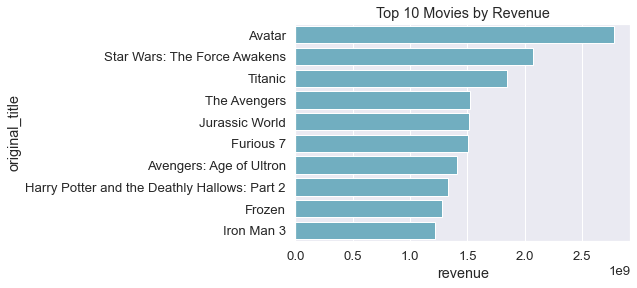

In [10]:
#View the top 10 movies by their revenue
fast_bar(
    top10_revenue['revenue'],
    top10_revenue['original_title'],
    'Top 10 Movies by Revenue',
    'Revenue',
    'Movie'
)

The highest revenue is that of _Avatar_ (about 2.78 billions).

In [11]:
np.intersect1d(np.array(top10_popularity['original_title']), np.array(top10_revenue['original_title']))

array(['Jurassic World', 'Star Wars: The Force Awakens'], dtype=object)

Movies that appeared in both top popularity and top revenue:
- Jurassic World
- Star Wars: The Force Awakens

From the previous we can observe the strong relationship between popularity and revenue.

### 2. The Top 10 Directors/Director Teams by Popularity and Revenue 
We now turn to the top 10 directors/director teams in terms of both popularity and revenues. In the rest of this part, we will refer to both individual directors and teams of directors as 'directors'.

#### 2.1. Top 10 Directors by Popularity

In [12]:
#Find the average popularity of movies for each director and select the top 10
directors_popularity = {director:0 for director in df_movies['director'].unique()}
for director in directors_popularity:
    directors_popularity[director] = df_movies[df_movies['director'] == director]['popularity'].mean()
directors_popularity = pd.Series(directors_popularity)
directors_popularity.sort_values(inplace=True)
directors_popularity = directors_popularity[-10:][-1::-1]
directors_popularity

Colin Trevorrow                   32.985763
George Miller                     14.675428
Joe Russo|Anthony Russo           12.971027
Chad Stahelski|David Leitch       11.422751
Don Hall|Chris Williams            8.691294
Christopher Nolan                  8.635610
Morten Tyldum                      8.110711
Lilly Wachowski|Lana Wachowski     7.753899
Kyle Balda|Pierre Coffin           7.404165
Robert Schwentke                   7.401188
dtype: float64

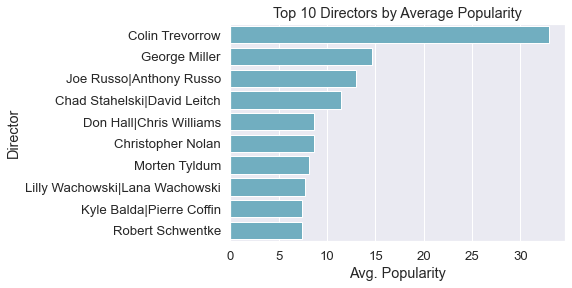

In [13]:
#Make a bar plot for the top 10
fast_bar(
    directors_popularity,
    directors_popularity.index,
    'Top 10 Directors by Average Popularity',
    'Avg. Popularity',
    'Director'
)

There's a large gap between Colin Tevorrow and the other directors. This suggests that the number of movies he has directed is small. We will see that next.

In [14]:
#Numer of movies directed by Colin Tevorrow
df_movies['director'].value_counts(sort=False).head()

Colin Trevorrow     1
George Miller       2
Robert Schwentke    2
J.J. Abrams         3
James Wan           5
Name: director, dtype: int64

As expected, Colin Tevorrow (and many other directors) have only a few movies within this dataset. This suggests the average popularity for their movies has not converged well.

#### 2.2. Top 10 Directors by Revenue

In [15]:
#Find the average revenue of movies for each director and select the top 10
directors_revenue = {director:0 for director in df_movies['director'].unique()}
for director in directors_revenue:
    directors_revenue[director] = df_movies[df_movies['director'] == director]['revenue'].mean()
directors_revenue = pd.Series(directors_revenue)
directors_revenue.sort_values(inplace=True)
directors_revenue = directors_revenue[-10:][-1::-1]
directors_revenue

Colin Trevorrow                              1.513529e+09
Joss Whedon                                  1.462297e+09
Chris Buck|Jennifer Lee                      1.274219e+09
Shane Black                                  1.215440e+09
James Cameron                                1.180488e+09
Kyle Balda|Pierre Coffin                     1.156731e+09
Lee Unkrich                                  1.063172e+09
David Yates                                  1.038574e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon    9.198388e+08
J.J. Abrams                                  9.087081e+08
dtype: float64

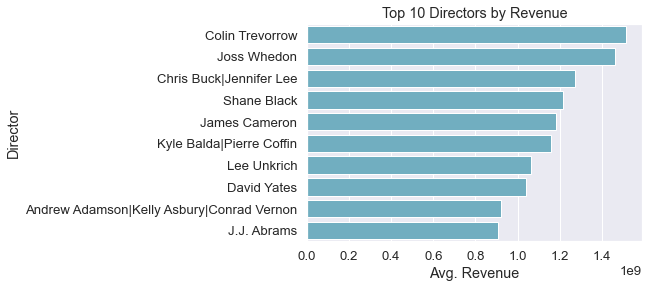

In [16]:
#Make a bar plot for the top 10
fast_bar(
    directors_revenue,
    directors_revenue.index,
    'Top 10 Directors by Revenue',
    'Avg. Revenue',
    'Director'
)

Again, Colin Tevorrow leads the top 10 list.

### 3. How The Budget Relates to Popularity and Revenue
In this part, we will be examining whether the popularity increases with the budget. For this, we will use a scatter plot of the budget vs the popularity and another plot of the popularity vs revenue.

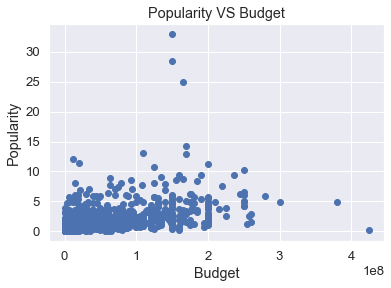

In [17]:
fast_scatter(
    df_movies['budget'],
    df_movies['popularity'],
    'Popularity VS Budget',
    'Budget',
    'Popularity'
)

Examining the left-hand side of this plot, we find that the popularity increases significantly with the budget. However, in the rest of the plot, other factors seem to be more significant.

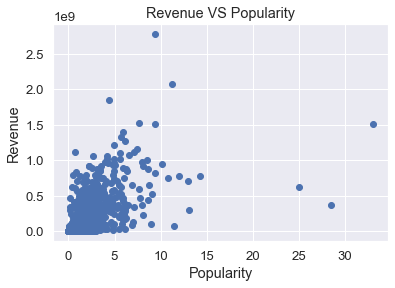

In [18]:
fast_scatter(
    df_movies['popularity'],
    df_movies['revenue'],
    'Revenue VS Popularity',
    'Popularity',
    'Revenue'
)

The relationship between the popularity and revenue is fairly stronger.

## Conclusions
#### What We Can Deduce From the Data
- ##### The top 10 popular movies are:
1.  Jurassic World
2.  Mad Max: Fury Road
3.  Interstellar
4.  Guardians of the Galaxy
5.  Insurgent
6.  Captain America: The Winter Soldier
7.  Star Wars
8.  John Wick
9.  Star Wars: The Force Awakens
10. The Hunger Games: Mockingjay - Part 1
- ##### The top 10 movies in revenue are:
1.  Avatar
2.  Star Wars: The Force Awakens
3.  Titanic
4.  The Avengers
5.  Jurassic World
6.  Furious 7
7.  Avengers: Age of Ultron
8.  Harry Potter and the Deathly Hallows: Part 2
9.  Frozen
10. Iron Man 3
- ##### The following two movies topped in both popularity and revenue:
1. Jurassic World
2. Star Wars: The Force Awakens
- ##### The top 10 directors (director teams) regarding the revenue of their movies are:
1.  Colin Trevorrow
2.  George Miller
3.  Joe Russo, Anthony Russo
4.  Chad Stahelski, David Leitch
5.  Don Hall, Chris Williams
6.  Christopher Nolan
7.  Morten Tyldum
8.  Lilly Wachowski, Lana Wachowski
9.  Kyle Balda, Pierre Coffin
10. Robert Schwentke
- ##### The top 10 directors (director teams) regarding the revenue of their movies are: 
1.  Colin Trevorrow
2.  Joss Whedon
3.  Chris Buck, Jennifer Lee
4.  Shane Black
5.  James Cameron
6.  Kyle Balda, Pierre Coffin
7.  Lee Unkrich
8.  David Yates
9.  Andrew Adamson, Kelly Asbury, Conrad Vernon
10. J.J. Abrams
- On lower budgets, popularity increases significantly as the budget increases. However, on larger works, this significance ceases.
- The revenue correlates positively well with the popularity.

#### Limitations
Many directors in the dataset had only one movie directed by them in the period covered by this dataset. This indicates that measures related to the directors have not converged well. What makes this a real problem is that it appeared with some of the top directors. Overall, the dataset was good and free from many other common defects that are found in other datasets such as the abundance of null values, duplicates, and other defectant data.

#### Final Thoughts
It was a joy for me to do the data analysis process on this dataset. I really liked working on it, the dataset itself was tidy compared to many other datasets I've seen and did not need much work to clean and set up for analysis. In the end, I hope my work was as good as expected.